In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
connection = sql.connect("gcs_gh_20220117.db")

query_params = ['''SELECT * FROM s1_temp''','''SELECT * FROM s2_temp''', '''SELECT * FROM s1_hum''', '''SELECT * FROM s2_hum''']

df_temp1 = pd.read_sql_query(query_params[0], connection, parse_dates=['timestamp'], index_col=['timestamp'])
# df_temp2 = pd.read_sql_query(query_params[1], connection, parse_dates=['timestamp'], index_col=['timestamp'])
df_hum1  = pd.read_sql_query(query_params[2], connection, parse_dates=['timestamp'], index_col=['timestamp'])
# df_hum2 = pd.read_sql_query(query_params[3], connection, parse_dates=['timestamp'], index_col=['timestamp'])

In [3]:
df_temp1_daily = df_temp1.resample('D').mean()
print(df_temp1_daily)

                value
timestamp            
2020-01-09  14.766511
2020-01-10  15.567704
2020-01-11  14.201580
2020-01-12  14.336647
2020-01-13  14.500008
...               ...
2022-01-13  13.764685
2022-01-14  13.208151
2022-01-15   9.973787
2022-01-16   8.329606
2022-01-17   9.825963

[740 rows x 1 columns]


In [4]:
df_merged = pd.merge_asof(df_hum1.sort_index(), df_temp1.sort_index(), on="timestamp")
df_merged = df_merged.set_index('timestamp')
df_merged

,value_x,value_y
timestamp,,
2020-01-09 00:01:42,87.20073,13.51225
2020-01-09 00:06:42,87.26787,13.55497
2020-01-09 00:11:43,87.27702,13.59769
2020-01-09 00:16:43,87.31060,13.62440
2020-01-09 00:21:44,87.43267,13.66713
...,...,...
2022-01-17 10:37:52,89.62081,11.35195
2022-01-17 10:42:52,89.39193,11.46410
2022-01-17 10:47:52,89.35531,11.56290


In [18]:
def create_season_cmprsn_humtemp(df, start, end, freq, title):
    df_temp1_daily_merged = df.sort_index().loc[start:end]
    df_temp1_daily_merged = df_temp1_daily_merged.resample(freq).mean()
    df_temp1_daily_merged.rename(columns = {'value_x':'%humidity', 'value_y':'temperature'}, inplace = True)
    
    fig, axes = plt.subplots(figsize=(8,4))
#     axes1 = axes.twinx()
#     axes1.scatter(df_temp1_daily_merged.index, df_temp1_daily_merged['value_x'], color="#9DC0BC", label="hum")
#     axes1.set_ylabel("hum in %")

#     axes.scatter(df_temp1_daily_merged.index, df_temp1_daily_merged['value_y'], color="#EF6F6C", label="temp")
#     axes.set_ylabel("time")

    fig.suptitle("Correlation %rH and °C in {}".format(title))
#     fig.legend()
    plt.rcParams.update({'font.size': 7.5})
    
    sns.heatmap(df_temp1_daily_merged.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


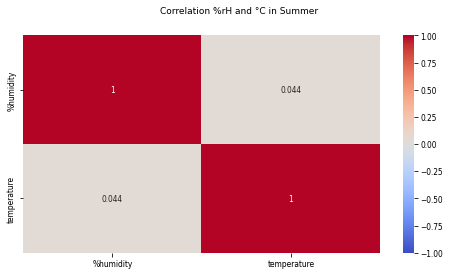

In [19]:
# create_season_cmprsn_humtemp(df_merged, '2020-12-01', '2021-01-17', 'D', "Winter")
create_season_cmprsn_humtemp(df_merged, '2020-06-01', '2020-08-31', 'D', "Summer") 

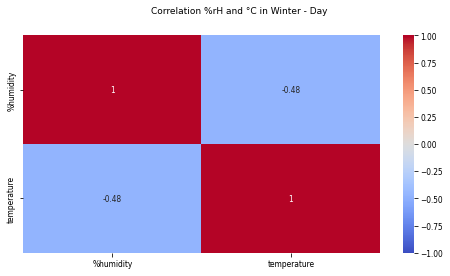

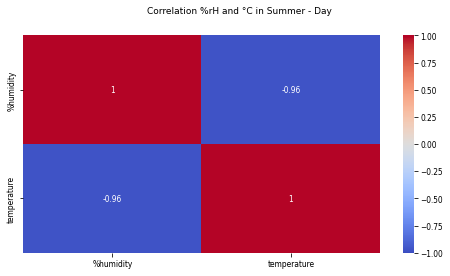

In [20]:
create_season_cmprsn_humtemp(df_merged, '2020-01-15', '2020-01-16', 'H', "Winter - Day") 
create_season_cmprsn_humtemp(df_merged, '2020-07-17', '2020-07-18', 'H', "Summer - Day") 

In [21]:
def create_season_cmprsn(df, start_s1, end_s1, start_s2, end_s2, color1, color2, label1, label2, formatting, title, xticks):
    df_s1 = df.sort_index().loc[start_s1:end_s1]
    df_s2 = df.sort_index().loc[start_s2:end_s2]
    
    print(df_s1.describe())
    print(df_s2.describe())
    
    df_s1 = df_s1.set_index(df_s2.index)
    
    fig, axes = plt.subplots(figsize=(8,4))
    plt.scatter(df_s1.index.strftime(formatting), df_s1['value'], color=color1, label=label1)
    plt.scatter(df_s2.index.strftime(formatting), df_s2['value'], color=color2, label=label2)
    
    plt.title(title)
    plt.xlabel("time in days")
    plt.ylabel("temperature in °C")
    plt.ylim(0, 45)
    plt.xticks(np.arange(0, len(df_s1.index)+1, xticks), rotation=45)
    plt.legend()
    
    plt.rcParams.update({'font.size': 7.5})

           value         day      month
count  48.000000   48.000000  48.000000
mean   14.792288  229.875000   8.104167
std     2.452603  165.481583   5.316532
min     8.454066    1.000000   1.000000
25%    13.463495   12.750000   1.000000
50%    14.960698  342.500000  12.000000
75%    16.606599  354.250000  12.000000
max    18.173420  366.000000  12.000000
           value         day      month
count  48.000000   48.000000  48.000000
mean   13.618619  229.229167   8.104167
std     2.034285  164.998806   5.316532
min     8.329606    1.000000   1.000000
25%    12.750629   12.750000   1.000000
50%    13.534860  341.500000  12.000000
75%    14.772634  353.250000  12.000000
max    18.400774  365.000000  12.000000
           value        day      month
count  92.000000   92.00000  92.000000
mean   24.446524  198.50000   7.010870
std     2.413486   26.70206   0.818664
min    19.095246  153.00000   6.000000
25%    22.522772  175.75000   6.000000
50%    24.477567  198.50000   7.000000
75%    

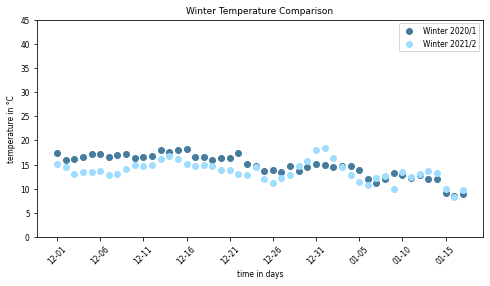

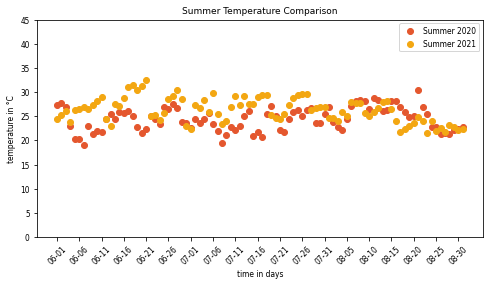

In [22]:
# Winter/Summer 
df_temp1_daily = df_temp1.resample('D').mean()

create_season_cmprsn(df_temp1_daily, '2020-12-01', '2021-01-17', '2021-12-01', '2022-01-17', "#457B9D", "#A0DDFF", "Winter 2020/1", "Winter 2021/2", "%m-%d", "Winter Temperature Comparison", 5)
create_season_cmprsn(df_temp1_daily, '2020-06-01', '2020-08-31', '2021-06-01', '2021-08-31', "#E4572E", "#F3A712", "Summer 2020", "Summer 2021", "%m-%d","Summer Temperature Comparison", 5)


            value         day  month
count  168.000000  168.000000  168.0
mean    14.642755   15.000000    1.0
std      1.897540    2.005979    0.0
min     12.203339   12.000000    1.0
25%     13.096175   13.000000    1.0
50%     14.110625   15.000000    1.0
75%     15.871147   17.000000    1.0
max     19.162442   18.000000    1.0
            value         day  month
count  168.000000  168.000000  168.0
mean    10.346534   15.000000    1.0
std      2.221396    2.005979    0.0
min      6.716744   12.000000    1.0
25%      8.398621   13.000000    1.0
50%     10.033778   15.000000    1.0
75%     12.347151   17.000000    1.0
max     15.087740   18.000000    1.0
            value         day  month
count  168.000000  168.000000  168.0
mean    23.867671  199.000000    7.0
std      6.265473    2.005979    0.0
min     15.290926  196.000000    7.0
25%     19.184248  197.000000    7.0
50%     21.838331  199.000000    7.0
75%     27.805894  201.000000    7.0
max     40.818584  202.000000    7.0
 

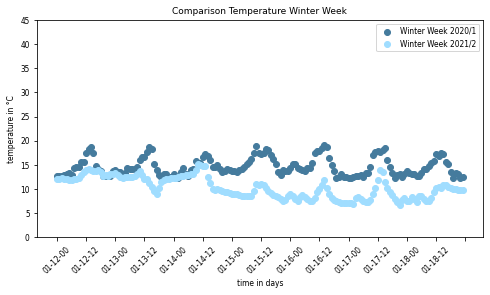

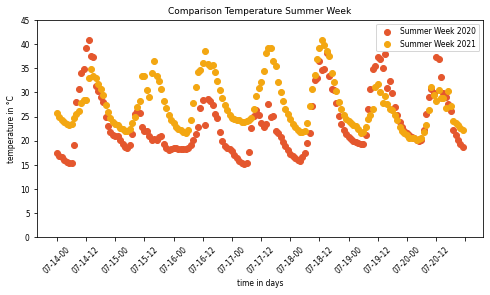

In [23]:
# Winter/Summer Week 
df_temp1_hourly = df_temp1.resample('H').mean()

create_season_cmprsn(df_temp1_hourly, '2020-01-12', '2020-01-18', '2021-01-12', '2021-01-18', "#457B9D", "#A0DDFF", "Winter Week 2020/1", "Winter Week 2021/2", "%m-%d-%H", "Comparison Temperature Winter Week", 12)
create_season_cmprsn(df_temp1_hourly, '2020-07-14', '2020-07-20', '2021-07-14', '2021-07-20',  "#E4572E", "#F3A712", "Summer Week 2020", "Summer Week 2021", "%m-%d-%H", "Comparison Temperature Summer Week", 12)

           value        day  month
count  48.000000  48.000000   48.0
mean   15.304899  15.500000    1.0
std     1.989076   0.505291    0.0
min    12.272324  15.000000    1.0
25%    13.748958  15.000000    1.0
50%    14.785324  15.500000    1.0
75%    17.250040  16.000000    1.0
max    19.162442  16.000000    1.0
           value        day  month
count  48.000000  48.000000   48.0
mean    8.792545  15.500000    1.0
std     1.174255   0.505291    0.0
min     7.123038  15.000000    1.0
25%     7.937585  15.000000    1.0
50%     8.589497  15.500000    1.0
75%     9.216434  16.000000    1.0
max    11.806876  16.000000    1.0
           value         day  month
count  48.000000   48.000000   48.0
mean   23.083521  199.500000    7.0
std     6.397108    0.505291    0.0
min    15.290926  199.000000    7.0
25%    17.437931  199.000000    7.0
50%    22.124167  199.500000    7.0
75%    26.550737  200.000000    7.0
max    38.150398  200.000000    7.0
           value         day  month
count  48.

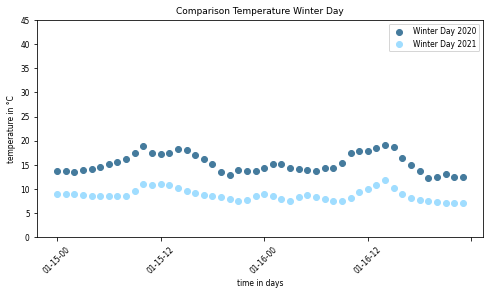

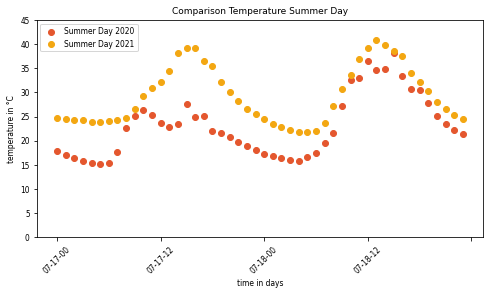

In [24]:
# Winter/Summer day:'2020-01-15':'2020-01-16'
create_season_cmprsn(df_temp1_hourly, '2020-01-15', '2020-01-16', '2021-01-15', '2021-01-16', "#457B9D", "#A0DDFF", "Winter Day 2020", "Winter Day 2021", "%m-%d-%H", "Comparison Temperature Winter Day", 12)
create_season_cmprsn(df_temp1_hourly, '2020-07-17', '2020-07-18', '2021-07-17', '2021-07-18', "#E4572E", "#F3A712", "Summer Day 2020", "Summer Day 2021", "%m-%d-%H", "Comparison Temperature Summer Day", 12)

                        value  day  month
timestamp                                
2020-06-01 00:02:39  18.55650  153      6
2020-06-01 00:07:39  18.45770  153      6
2020-06-01 00:12:39  18.36957  153      6
2020-06-01 00:17:39  18.24407  153      6
2020-06-01 00:22:39  18.17464  153      6
...                       ...  ...    ...
2020-08-31 23:35:28  18.34287  244      8
2020-08-31 23:40:28  18.28679  244      8
2020-08-31 23:45:28  18.23072  244      8
2020-08-31 23:50:28  18.23072  244      8
2020-08-31 23:55:28  18.21737  244      8

[24696 rows x 3 columns]


<AxesSubplot:>

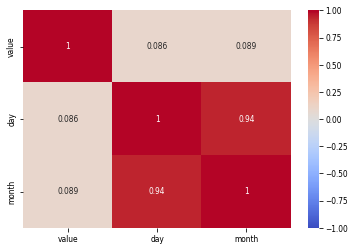

In [25]:
df_temp1['day'] = df_temp1.index.dayofyear
df_temp1['month'] = df_temp1.index.month
df_sum0 = df_temp1.sort_index().loc['2020-06-01':'2020-08-31']
print(df_sum0)
sns.heatmap(df_sum0.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

                value  day  month
timestamp                        
2020-01-09  87.103925    9      1
2020-01-10  86.770854   10      1
2020-01-11  85.025609   11      1
2020-01-12  82.147928   12      1
2020-01-13  84.404149   13      1
...               ...  ...    ...
2022-01-13  85.977021   13      1
2022-01-14  87.184219   14      1
2022-01-15  87.916483   15      1
2022-01-16  87.870819   16      1
2022-01-17  88.779658   17      1

[740 rows x 3 columns]


<AxesSubplot:>

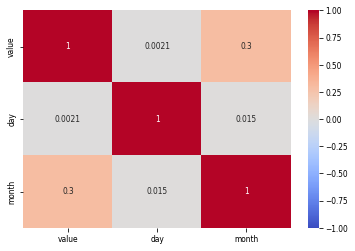

In [26]:
df_hum1 = df_hum1.resample('D').mean()
df_hum1['day'] = df_hum1.index.day
df_hum1['month'] = df_hum1.index.month
print(df_hum1)
sns.heatmap(df_hum1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [27]:
# df_temp1 = df_temp1.resample('D').mean()

# fig, axes = plt.subplots(2,2, figsize=(40, 30))


# font = {'size':5}
# plt.rc('font', **font)


# df_temp1_summer = df_temp1.sort_index().loc['2020-06-01':'2020-08-31']
# print(df_temp1_summer.describe())
# axes[0][1].scatter(df_temp1_summer.index,'value', data = df_temp1_summer, color='orange')
# axes[0][1].set_title('Summer 01.06.2020 - 31.08.2020')
# axes[0][1].tick_params(axis="x", labelrotation=45)
# axes[0][1].set_ylabel('temp in °C')
# axes[0][1].set_ylim(bottom=0, top=50)

# df_temp1_winter = df_temp1.sort_index().loc['2020-12-01':'2021-02-28']
# print(df_temp1_winter.describe())
# axes[0][0].scatter(df_temp1_winter.index,'value', data = df_temp1_winter)
# axes[0][0].set_title('Winter 01.12.2020 - 28.02.2021')
# axes[0][0].tick_params(axis="x", labelrotation=45)
# axes[0][0].set_ylabel('temp in °C')
# axes[0][0].set_ylim(bottom=0, top=50)

# df_temp1_summer = df_temp1.sort_index().loc['2021-06-01':'2021-08-31']
# print(df_temp1_summer.describe())
# axes[1][1].scatter(df_temp1_summer.index,'value', data = df_temp1_summer, color='orange')
# axes[1][1].set_title('Summer 01.06.2021 - 31.08.2021')
# axes[1][1].tick_params(axis="x", labelrotation=45)
# axes[1][1].set_xlabel('time')
# axes[1][1].set_ylabel('temp in °C')
# axes[1][1].set_ylim(bottom=0, top=50)

# df_temp1_winter = df_temp1.sort_index().loc['2021-12-01':'2022-01-10']
# print(df_temp1_winter.describe())
# axes[1][0].scatter(df_temp1_winter.index,'value', data = df_temp1_winter)
# axes[1][0].set_title('Winter 01.12.2020 - 10.12.2021')
# axes[1][0].tick_params(axis="x", labelrotation=45)
# axes[1][0].set_xlabel('time')
# axes[1][0].set_ylabel('temp in °C')
# axes[1][0].set_ylim(bottom=0, top=50)


# fig.suptitle("Comparison Seasonal Temperatures")

In [28]:
# median week in summer/winter 2020/21

# fig, axes = plt.subplots(2,2, figsize=(30, 20))
# font = {'size':25}
# plt.rc('font', **font)
# fig.autofmt_xdate()

# df_temp1_winterWeek = df_temp1.sort_index().loc['2020-01-12':'2020-01-18']
# print(df_temp1_winterWeek.describe())
# axes[0][0].scatter(df_temp1_winterWeek.index,'value', data = df_temp1_winterWeek)
# axes[0][0].set_title('Winter Week 12.1.20 -18.1.20')
# axes[0][0].set_ylabel('temp in °C')
# axes[0][0].set_ylim(bottom=0, top=50)

# df_temp1_summerWeek = df_temp1.sort_index().loc['2020-07-14':'2020-07-20']
# print(df_temp1_summer.describe())
# axes[0][1].scatter(df_temp1_summerWeek.index,'value', data = df_temp1_summerWeek, color='orange')
# axes[0][1].set_title('Summer Week 14.07.2020 - 20.07.2020')
# axes[0][1].set_ylabel('temp in °C')
# axes[0][1].set_ylim(bottom=0, top=50)

# df_temp1_winterWeek = df_temp1.sort_index().loc['2020-12-01':'2021-01-18'] #neue Daten
# print(df_temp1_winterWeek.describe())
# axes[1][0].scatter(df_temp1_winterWeek.index,'value', data = df_temp1_winterWeek)
# axes[1][0].set_title('Winter Week 12.1.21 -18.1.21')
# axes[1][0].set_xlabel('time')
# axes[1][0].set_ylabel('temp in °C')
# axes[1][0].set_ylim(bottom=0, top=50)

# df_temp1_summerWeek = df_temp1.sort_index().loc['2021-07-14':'2021-07-20']
# print(df_temp1_summerWeek.describe())
# axes[1][1].scatter(df_temp1_summerWeek.index,'value', data = df_temp1_summerWeek, color='orange')
# axes[1][1].set_title('Summer Week 14.07.2021 - 20.07.2021')
# axes[1][1].set_xlabel('time')
# axes[1][1].set_ylabel('temp in °C')
# axes[1][1].set_ylim(bottom=0, top=50)

# fig.suptitle("Comparison Seasonal Week Temperatures")

# summer: 14.-20.07.20/21
# winter: 12.1.21 -18.1.21

In [29]:
# median day in summer/winter 2020/21
# summer: 17.07.2020/1
# winter: 15.01.2021

# fig, axes = plt.subplots(2,2, figsize=(30, 20))

# df_temp1_summerDay = df_temp1.sort_index().loc['2020-07-17':'2020-07-18']
# print(df_temp1_summerDay.describe())
# axes[0][0].plot(df_temp1_summerDay.index,'value', data=df_temp1_summerDay, color='orange')
# axes[0][0].set_title('17. - 18.07.2020')
# axes[0][0].set_xlabel('time')
# axes[0][0].set_ylabel('temp in °C')
# axes[0][0].set_ylim(bottom=0, top=50)

# df_temp1_summerDay = df_temp1.sort_index().loc['2021-07-17':'2021-07-18']
# print(df_temp1_summerDay.describe())
# axes[1][0].plot(df_temp1_summerDay.index,'value', data=df_temp1_summerDay, color='orange')
# axes[1][0].set_title('17. - 18.07.2021')
# axes[1][0].set_xlabel('time')
# axes[1][0].set_ylabel('temp in °C')
# axes[1][0].set_ylim(bottom=0, top=50)

# df_temp1_summerDay = df_temp1.sort_index().loc['2020-01-15':'2020-01-16']
# print(df_temp1_summerDay.describe())
# axes[0][1].plot(df_temp1_summerDay.index,'value', data=df_temp1_summerDay, color='blue')
# axes[0][1].set_title('17.07.2020')
# axes[0][1].set_xlabel('time')
# axes[0][1].set_ylabel('temp in °C')
# axes[0][1].set_ylim(bottom=0, top=50)

# df_temp1_winterDay = df_temp1.sort_index().loc['2020-07-17':'2020-07-18']
# df_temp1_winterDay = df_temp1.sort_index().loc['2021-07-17':'2021-07-18']

In [30]:
connection.close()